# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [1]:
!pip install -Uqq fastbook 
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.1 MB/s eta 0:00:00
Mounted at /content/gdrive


Import necessary libraries

In [2]:
from fastbook import *
from fastai.vision.widgets import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

In [7]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()
path1 = export_path/'Apple'

if not path1.exists():
  path1.mkdir()
  Apple = search_images_ddg('Apple',max_images= 150)
  download_images(path1, urls=Apple)

path2 = export_path/'Pear'
if not path2.exists():
  path2.mkdir()
  Pear = search_images_ddg('Pear',max_images= 150)
  download_images(path2, urls=Pear)

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

In [4]:
print(len(Apple))
Apple[1]   

150


'https://www.botanicaplantnursery.co.uk/user/products/large/red-devil-apple-400-p.jpg'

0: https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/11/06/17/pears3.jpg
1: https://i.stack.imgur.com/7oAX5.jpg
2: https://www.starkbros.com/images/dynamic/4647-960x960.jpg
3: https://chestnuthilltreefarm.com/wp-content/uploads/2020/01/Kieffer-Pear.jpg
4: http://img.crocdn.co.uk/images/products2/pl/00/00/00/19/pl0000001935.jpg?width=940&height=940
5: https://vignette.wikia.nocookie.net/fruit/images/f/f3/Pear2.jpg/revision/latest?cb=20150621135501
6: http://asianfruitworld.com/wp-content/uploads/2017/06/asian-pear.jpg
406 Client Error: Not Acceptable for url: http://asianfruitworld.com/wp-content/uploads/2017/06/asian-pear.jpg
7: https://s3.amazonaws.com/bargainhunter/images/articles/bradford-pear-tree-poses-an-ecological-threat-in-ohio/NEWS_170429964_AR_-1_OVTEYNABTBZO.jpg?mtime=20170808114319
8: https://www.agrifarming.in/wp-content/uploads/2021/02/pear-tree-3526690_1920.jpg
9: https://calfreshfruit.com/wp-content/uploads/sites/4/2019/12/full-frame-shot-of-organic-raw

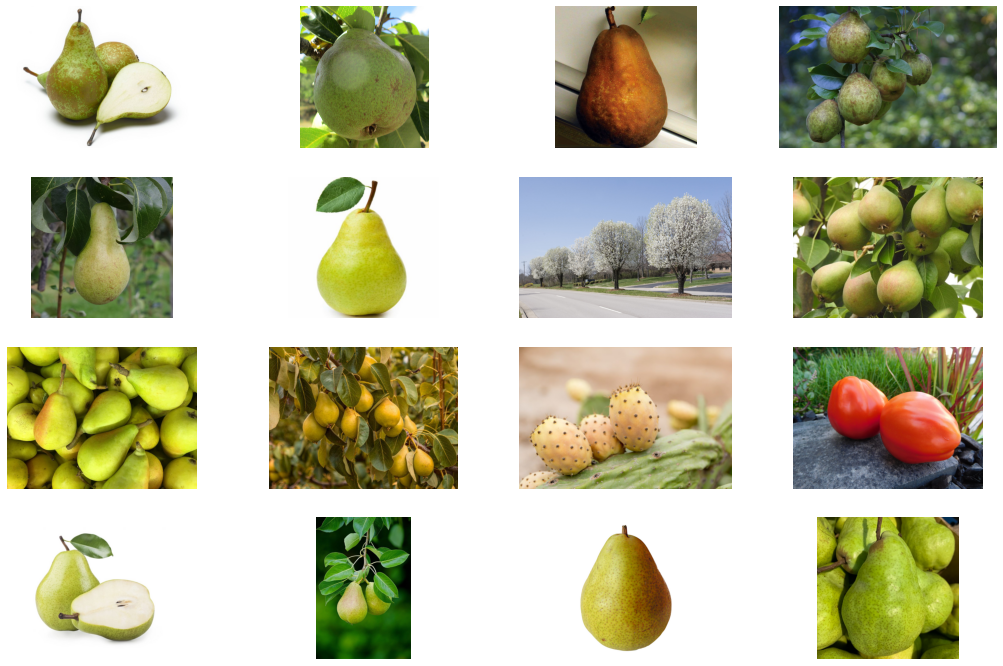

In [9]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(Pear):
  try:
    url = Pear[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [15]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/guitar/')
export_path.ls()
path_1 = export_path/'Electric guitar'

if not path_1.exists():
  path_1.mkdir()
  Electric_guitar = search_images_ddg('Electric guitar',max_images= 150)
  download_images(path_1, urls=Electric_guitar)

path_2 = export_path/'Acoustic guitar'
if not path_2.exists():
  path_2.mkdir()
  Acoustic_guitar = search_images_ddg('Acoustic guitar',max_images= 150)
  download_images(path_2, urls=Acoustic_guitar)

fns = get_image_files(export_path)
failed = verify_images(fns)
failed.map(Path.unlink)


(#3) [None,None,None]

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

<bound method Datasets.show of (#229) [(PILImage mode=RGB size=2012x3200, TensorCategory(0)),(PILImage mode=RGB size=1000x1501, TensorCategory(1)),(PILImage mode=RGB size=1024x1022, TensorCategory(0)),(PILImage mode=RGB size=2012x3200, TensorCategory(1)),(PILImage mode=RGB size=1600x1600, TensorCategory(1)),(PILImage mode=RGB size=1000x1000, TensorCategory(0)),(PILImage mode=RGB size=900x2202, TensorCategory(0)),(PILImage mode=RGB size=1600x1600, TensorCategory(0)),(PILImage mode=RGB size=1600x1060, TensorCategory(0)),(PILImage mode=RGB size=1600x1600, TensorCategory(0))...]>

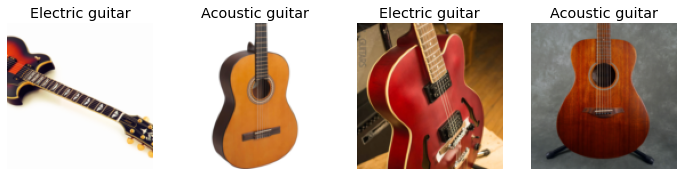

In [16]:
guitar = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items = get_image_files, splitter = RandomSplitter(valid_pct =0.2,seed = 42),get_y = parent_label, item_tfms = Resize(128))
dls = guitar.dataloaders('/content/gdrive/MyDrive/Colab Notebooks/guitar')
dls.train.show_batch(max_n=4, nrows=1)
dls.train.show

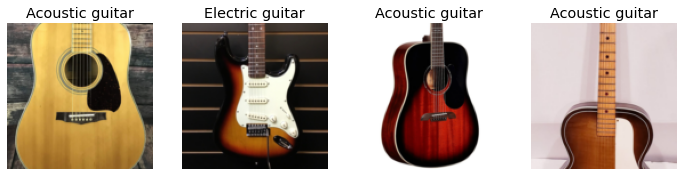

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

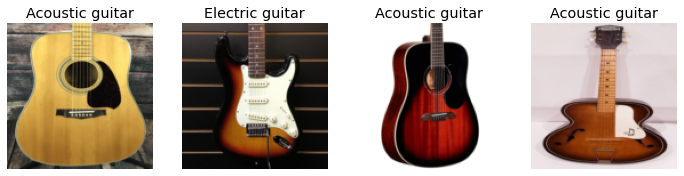

In [21]:
guitar = guitar.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = guitar.dataloaders('/content/gdrive/MyDrive/Colab Notebooks/guitar')
dls.valid.show_batch(max_n=4, nrows=1)

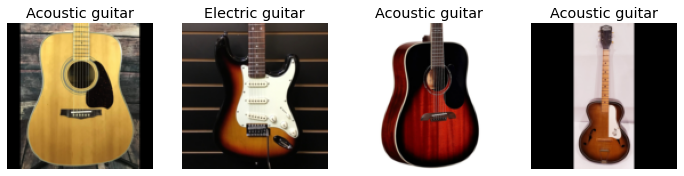

In [25]:
guitar = guitar.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = guitar.dataloaders('/content/gdrive/MyDrive/Colab Notebooks/guitar')
dls.valid.show_batch(max_n=4, nrows=1)

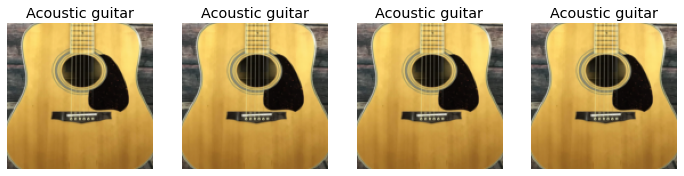

In [26]:
guitar = guitar.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = guitar.dataloaders('/content/gdrive/MyDrive/Colab Notebooks/guitar')
dls.valid.show_batch(max_n=4, nrows=1, unique = True)

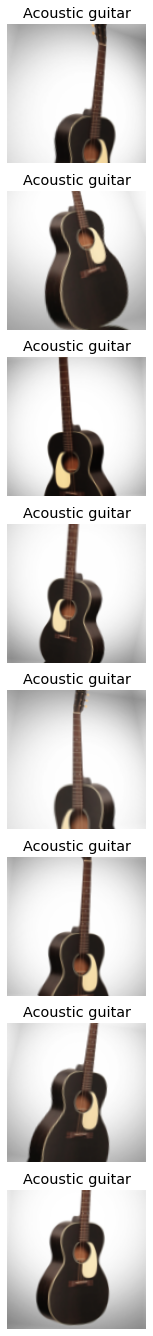

In [27]:
guitar = guitar.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=1))
dls = guitar.dataloaders('/content/gdrive/MyDrive/Colab Notebooks/guitar')
dls.train.show_batch(max_n= 8,nrows= 8, unique = True)

**Question 1:** How many images of each class are in trainging and validation sets?

There are 120 images of each class in the validation sets and there are 30 images of each class in the training sets.

## 4. Setup vision learner
Setup a vision learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [28]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

In [29]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.302095,1.470566,0.421053,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.486564,0.947979,0.333333,00:24
1,0.466829,0.999913,0.315789,00:25
2,0.420703,0.798972,0.192982,00:23
3,0.358528,0.819302,0.175439,00:24
4,0.306837,0.758384,0.122807,00:22
5,0.277521,0.685210,0.122807,00:23
6,0.243640,0.676157,0.122807,00:24
7,0.236067,0.649110,0.105263,00:23
8,0.215072,0.619659,0.105263,00:23
9,0.200015,0.617402,0.087719,00:23


**Question 2:** Is the model overfitting? Why, why not?

it is not overfitting as the traning loss is decreasing with epoch so it is learning from the data and error rate is decreasing so it is imoroving 

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


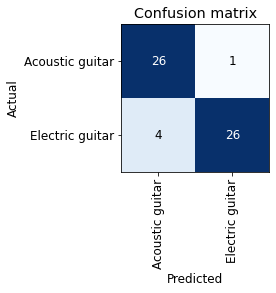

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**Question 3:** How many false positive, false negative errors?

there were 1 false postive and 4 false negative errors

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

Trained Classifier to tell differnce between acoustic guitar and electric guitar. 150 images of each class were downloaded, out of which, 30 images were the training set for each class. The rest of the 120 images of each class were the validation set. The error rate achieved was 8.7719%

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

There were no problems with the data.I am satisfoed with the performance of this model given the relatively low error rate given that there are only a few distinct difference between the objects.


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

solving this lab was very beneficial as i got to learn a lot of the fastai basics as i was thinking it would be similar to endg 410